<a href="https://colab.research.google.com/github/harnetlinh/Image-Classification/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

In this project, you are provided with a dataset of satellite images, representing patches that contain different types of land occupation, namely:


1.   Annual Crops
2.   Forest
3.   Herbaceous Vegetation
4.   Highway
5.   Industrial Lands
6.   Pastures
7.   Permanent Crops
8.   Residential Areas
9.   Rivers
10.  Seas or Lakes

You task is to build a classifier to automatically distinguish these types of land. This problem, very common in remote sensing, has many applications in agriculture, agronomy, land management, etc.







# Data loading

In [ ]:
!git clone https://github.com/axelcarlier/land.git

fatal: destination path 'land' already exists and is not an empty directory.


In [ ]:
import numpy as np
import PIL
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split


path = '/content/land/'

# Read images into X variable
X = np.zeros((20000, 64, 64, 3))
for i in range(20000):
  X[i] = np.array(Image.open(path+'Data/image_'+str(i).zfill(5) + '.jpg'))

y = np.load(path+'y_train.npy')
# Assign an id to each class
class_names = ('AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake')
Y = np.zeros((y.shape))
# Build Y variable 
for i in range(0,10):
  Y[np.where(y == class_names[i])] = i


# Train/test split
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=2000, random_state=1)

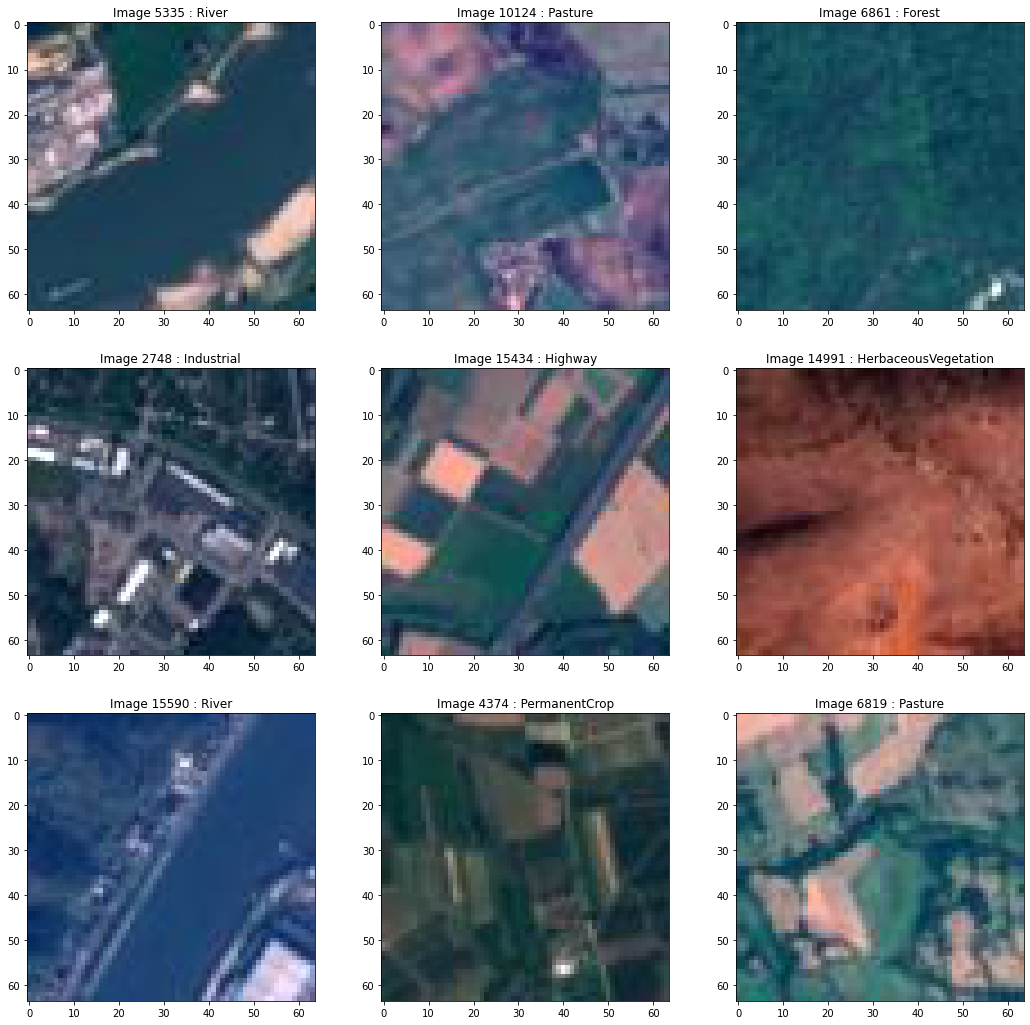

In [ ]:
import matplotlib.pyplot as plt

# Visualize samples from he database
plt.figure(figsize=(18, 18))
for i in range(9):
  plt.subplot(3, 3, i+1)
  num = np.random.randint(X_train.shape[0])
  plt.imshow(X_train[num]/255);
  plt.title("Image {} : {}".format(num, class_names[y_train[num].astype('int')]))


In [ ]:
from keras.utils import np_utils
# Reshape X_train and X_test
# X_train = X_train.reshape(X_train.shape[0], 64*64*3)
# X_test = X_test.reshape(X_test.shape[0], 64*64*3)

# Normalize X_train and X_test
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# One-hot encode y_train and y_test
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Activation
from keras import optimizers

def baseline_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(128, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(64, input_dim=64*64*3, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  model.add(Activation("softmax"))
  model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=3e-4), metrics=['accuracy'])
  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
# Build model
model = baseline_model()
# Fit the model
history = model.fit(train_datagen.flow(X_train, y_train, batch_size=10), 
                    validation_data=(X_test, y_test),
                    epochs=40,
                    )

Epoch 1/40
1800/1800 [==============================] - 29s 16ms/step - loss: 2.1354 - accuracy: 0.3184 - val_loss: 2.0597 - val_accuracy: 0.3985
Epoch 2/40
1800/1800 [==============================] - 30s 17ms/step - loss: 2.0680 - accuracy: 0.3887 - val_loss: 2.0316 - val_accuracy: 0.4240
Epoch 3/40
1800/1800 [==============================] - 28s 16ms/step - loss: 2.0202 - accuracy: 0.4382 - val_loss: 1.9937 - val_accuracy: 0.4640
Epoch 4/40
1800/1800 [==============================] - 30s 16ms/step - loss: 1.9825 - accuracy: 0.4762 - val_loss: 1.9400 - val_accuracy: 0.5215
Epoch 5/40
1800/1800 [==============================] - 29s 16ms/step - loss: 1.9534 - accuracy: 0.5061 - val_loss: 1.9499 - val_accuracy: 0.5100
Epoch 6/40
1800/1800 [==============================] - 29s 16ms/step - loss: 1.9434 - accuracy: 0.5151 - val_loss: 1.9251 - val_accuracy: 0.5390
Epoch 7/40
1800/1800 [==============================] - 30s 17ms/step - loss: 1.9319 - accuracy: 0.5279 - val_loss: 1.9142 -

In [ ]:
# Final evaluation of the model
def plot_training_analysis():
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'b', linestyle="--",label='Training acc')
  plt.plot(epochs, val_acc, 'g', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'b', linestyle="--",label='Training loss')
  plt.plot(epochs, val_loss,'g', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

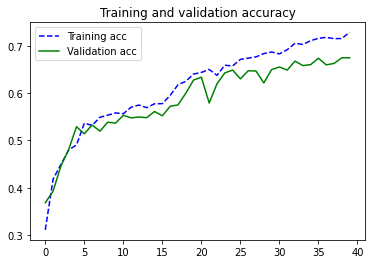

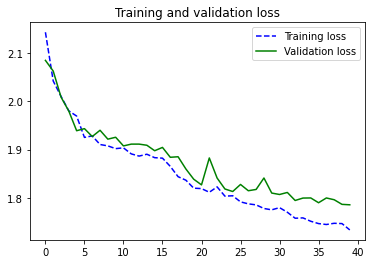

In [ ]:
plot_training_analysis()

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
# Predict
#Make predictions
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)  

score, acc = model.evaluate(X_test, y_test,
                            batch_size=200)
print('Test score:', score)
print('Test accuracy:', acc)

10/10 [==============================] - 0s 13ms/step - loss: 1.7920 - accuracy: 0.6705
Test score: 1.7920118570327759
Test accuracy: 0.6704999804496765


# Expected work

The goal of the project is to obtain the best possible **accuracy** on the test set. You are free to re-use the code from the labwork on binary image classification, but you will need to adapt it to this new problem:


*   Since the number of classes is different, the network output activation function, as well as the loss function, should be modified to suit this new problem. The number of neurons in the output layer also needs to be updated. 
*   Remote sensing images are different from natural images ; therefore **data augmentation** should be adapted as well.

You will follow the same order as in the lab: first, try a simple (small, and manually built) neural network without data augmentation, and from then you can progressively add complexity : data augmentation, then later transfer learning, fine-tuning, etc.

You should return me your Notebook, as well as a report summing up your work, before the date we will have decided.

The report **should contain all the following information** (its completeness will count in the grade):


1.   A brief presentation of the project and the data
2.   Details and explanation about your choice of data augmentation techniques (which transformation did you keep? which ones did you not keep? and why?)
3.   Details about the different methods you have tried: architecture (when you built it manually, otherwise just give the name of the architecture you used), hyperparameters (optimizers, learning rate, etc.). Here you do not need to explain everything you have tried, but just **three methods**, including at least one manual architecture, and one that uses Transfer learning.
4.   Detailed analysis of the results **of your best method**. I want to read about **quantitative measures**: accuracy (global and per class), confusion matrix, training and validation curve, etc. but also **qualitative measures**: I want you to show some examples from the training set that are well predicted, and some examples that are badly predicted, and I want to read your explanations on what works or does not work well.

Altogether, I am not expecting more than **10 pages** (less is OK !) for the report (including figures, curves, etc.)



